In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

In [2]:
#Task 1
x_nand=np.array([[0,0],[0,1],[1,0],[1,1]])
y_nand=np.array([[1],[1],[1],[0]])

In [3]:
#Task 1
x_nor=np.array([[0,0],[0,1],[1,0],[1,1]])
y_nor=np.array([[1],[0],[0],[0]])

In [4]:
#Task 2
x_xor=np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor=np.array([[0],[1],[1],[0]])

In [5]:
x_xnor=np.array([[0,0],[0,1],[1,0],[1,1]])
y_xnor=np.array([[1],[0],[0],[1]])

In [6]:
#Task 3
def preprocess(x,y):
    z = np.empty((0,3))
    for i in range(0,4):
        if y[i] ==1:
            z=np.append(z,[[-1,x[i][0],x[i][1]]],axis=0)
        else:
            z=np.append(z,[[1,-x[i][0],-x[i][1]]],axis=0)
    return z

z= preprocess(x_nand,y_nand)
print(z)
            
    

[[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [ 1. -1. -1.]]


In [7]:
#Task 4
def perceptron(z,w):
    #print(count)
    count = 0
    is_fail=True
    for i in range(len(z)):
            if(np.dot(z[i],w)<=0):
                w=w+z[i]
                is_fail=False
                break
            else:
                pass
    while not is_fail:
        count+=1
        if count>100:
            return w
        for i in range(len(z)):
            if(np.dot(z[i],w)<=0):
                w=w+z[i]
                is_fail=False
                break
            else:
                is_fail=True
    return w
#nand

perceptron_nand=perceptron(preprocess(x_nand,y_nand),[0,0,0])
print(perceptron_nand)
#nor

perceptron_nor=perceptron(preprocess(x_nor,y_nor),[0,0,0])
print(perceptron_nor)
    

[-4. -3. -2.]
[-1. -2. -2.]


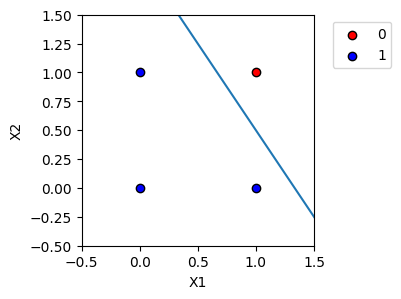

In [8]:
#Task 5
plot_decision_boundary(x_nand,y_nand,perceptron_nand)

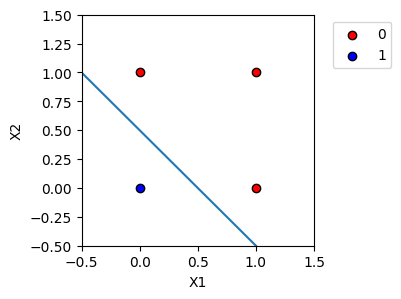

In [9]:

plot_decision_boundary(x_nor,y_nor,perceptron_nor)

[1. 2. 2.]


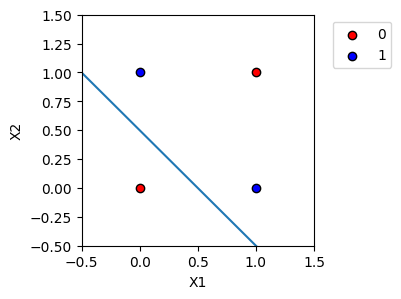

In [10]:
perceptron_xor=perceptron(preprocess(x_xor,y_xor),[0,0,0])
print(perceptron_xor)
plot_decision_boundary(x_xor,y_xor,perceptron_xor)

[-1. -2. -2.]


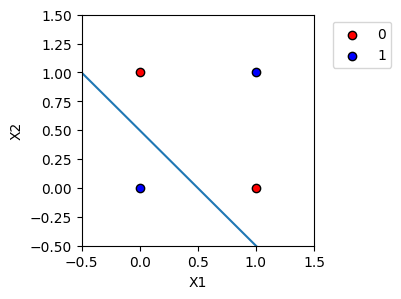

In [11]:
#Task 6
perceptron_xnor=perceptron(preprocess(x_xnor,y_xnor),[0,0,0])
print(perceptron_xnor)
plot_decision_boundary(x_xnor,y_xnor,perceptron_xnor)

In [12]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [13]:
arr=sigmoid(np.array([1,2,3]))
print(arr)

[0.73105858 0.88079708 0.95257413]


In [14]:
def binary_loss(y_pred,y):
    return np.mean(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))

In [15]:
def mse(y_pred,y):
    return np.mean((y-y_pred)**2)

In [41]:
#Task 7
def gradient(x,y,w,b):
    m=len(x)  #no. of inputs
    z=np.dot(x,w)+b
    y_pred=sigmoid(z)
    dz=(y_pred-y)
    dw=(1/m) * np.dot(x.T,dz)
    db=(1/m) * (np.sum(dz))
    return dw,db

#same for both mse and binary


    
    

In [39]:
def mse_gradient_descent(x,y,w,b,learn_rate=0.01,min_loss=0.01):
    y_pred=sigmoid(np.dot(x,w)+b)
    loss=mse(y_pred,y)    
    while loss>min_loss:
        dw,db=gradient(x,y,w,b)
        w=w-learn_rate*dw
        b=b-learn_rate*db
        y_pred=sigmoid(np.dot(x,w)+b)
        loss=mse(y_pred,y) 
    new_array=np.insert(w,0,b)
    y_pred=sigmoid(np.dot(x,w)+b)
    y_pred = np.where(y_pred>0.5,1,0)
    return new_array,y_pred
        
        
    

In [40]:
gradient_w_nand,pred_=mse_gradient_descent(x_nand,y_nand,np.zeros((2,1)),0,0.01,0.01)
print(gradient_w_nand)
print(pred_)

[ 6.19693529 -4.00100011 -4.00100011]
[[1]
 [1]
 [1]
 [0]]


In [36]:
def binary_gradient_descent(x,y,w,b,learn_rate=0.01,min_loss=0.01):
    y_pred=sigmoid(np.dot(x,w)+b)
    loss=binary_loss(y_pred,y)    
    while loss>min_loss:
        dw,db=gradient(x,y,w,b)
        w=w-learn_rate*dw
        b=b-learn_rate*db
        y_pred=sigmoid(np.dot(x,w)+b)
        loss=binary_loss(y_pred,y) 
    new_array=np.insert(w,0,b)
    y_pred=sigmoid(np.dot(x,w)+b)
    y_pred = np.where(y_pred>0.5,1,0) 
    return new_array,y_pred

In [38]:
gradient_w_nand_binary,pred=binary_gradient_descent(x_nand,y_nand,np.zeros((2,1)),0,0.01,0.01)
print(gradient_w_nand_binary)
print(pred)

[12.97225138 -8.53436255 -8.53436255]
[[1]
 [1]
 [1]
 [0]]


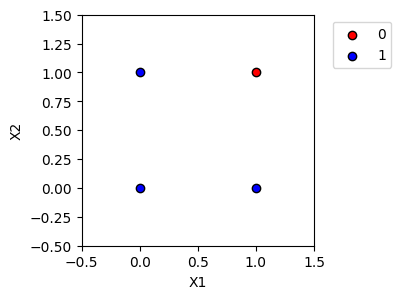

In [35]:
#Task 8
plot_decision_boundary(x_nand,y_nand,gradient_w_nand)

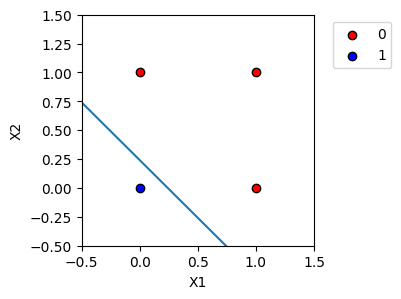

In [34]:
#Task 8
gradient_w_nor=mse_gradient_descent(x_nor,y_nor,np.zeros((2,1)),0,0.01,0.1)

plot_decision_boundary(x_nor,y_nor,gradient_w_nor)